## Модель регрессии

In [1]:
# импортируем библиотеки
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Этап 1. Загрузка данных из модуля datasets библиотеки Scikit-learn

**Вариант 1**. Загрузка из библиотеки sklearn

*Важно*! По этическим соображениям разработчики библиотеки удалят этот датасет из последующих версий, в этом случае воспользуйтесь Вариантом 2 (см. ниже).

In [ ]:
# импортируем данные и поместим их в переменную boston
from sklearn.datasets import load_boston
boston = load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
# определим тип данных нашего датасета
type(boston)

sklearn.utils.Bunch

In [ ]:
# посмотрим на структуру с помощью метода .keys()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [ ]:
# можно и так
for k in boston.keys():
  print(k)

data
target
feature_names
DESCR
filename
data_module


In [ ]:
# теперь посмотрим на тип данных data и target
print(type(boston.data), type(boston.target))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [ ]:
# начнем с изучения описания (без команды print() описание выведется не очень аккуратно)
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
# переведем данные в формат DataFrame из библиотеки Pandas
# для этого передадим функции DataFrame массив признаков boston.data
# название столбцов возьмем из boston.feature_names
boston_df = pd.DataFrame(boston.data, columns = boston.feature_names)

In [ ]:
# выведем первые пять районов с помощью функции head()
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
# теперь добавим в таблицу целевую переменную и назовем ее MEDV
boston_df['MEDV'] = boston.target

In [ ]:
# снова воспользуемся функций head()
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


**Вариант 2**. Скачивание датасета из сессионного хранилища

In [3]:
# если код, написанный ранее перестанет работать, просто запустите эту ячейку
# на выходе вы получите уже сформированный датафрейм
boston_df = pd.read_csv('/content/boston.csv')
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
# посмотрим с каким типом переменных нам предстоит работать
# для этого есть метод .info()
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [5]:
# посмотрим на основные статистические показатели (summary statistics)
# с помощью метода .describe()
boston_df.describe().round(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.01,0.00,0.46,0.00,0.38,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.22,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


### Этап 2. Предварительная обработка данных

In [ ]:
# проверим, есть ли пропущенные значения
boston_df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

### Этап 3. Исследовательский анализ данных (Exploratory Data Analysis)

In [ ]:
# посчитаем коэффициент корреляции для всего датафрейма и округлим значение
# получается корреляционная матрица
corr_matrix = boston_df.corr().round(2)
corr_matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


In [ ]:
# мы также можем построить диаграммы рассеяния, например,
# между целевой переменной MEDV и LSTAT и RM

# подготовим данные (поместим столбцы датафрейма в переменные)
x1 = boston_df['LSTAT']
x2 = boston_df['RM']
y = boston_df['MEDV']

Text(0.5, 1.0, 'Социальный статус населения и цены на жилье')

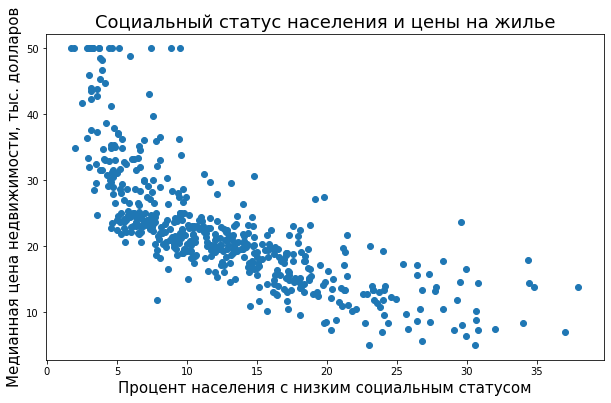

In [ ]:
# зададим размер и построим первый график
plt.figure(figsize = (10,6))
plt.scatter(x1, y)

# добавим подписи
plt.xlabel('Процент населения с низким социальным статусом', fontsize = 15)
plt.ylabel('Медианная цена недвижимости, тыс. долларов', fontsize = 15)
plt.title('Социальный статус населения и цены на жилье', fontsize = 18)

Text(0.5, 1.0, 'Среднее количество комнат и цены на жилье')

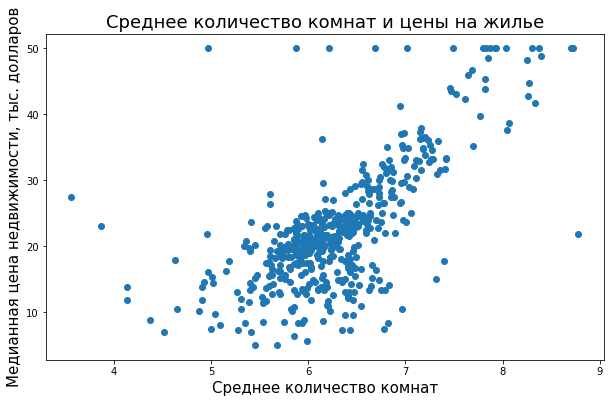

In [ ]:
# зададим размер и построим второй график
plt.figure(figsize = (10,6))
plt.scatter(x2, y)

# добавим подписи
plt.xlabel('Среднее количество комнат', fontsize = 15)
plt.ylabel('Медианная цена недвижимости, тыс. долларов', fontsize = 15)
plt.title('Среднее количество комнат и цены на жилье', fontsize = 18)

### Этап 4. Отбор и выделение признаков

In [ ]:
# отберем признаки с наиболее высокой корреляцией с целевой переменной
# и поместим их в переменную X
X = boston_df[['RM', 'LSTAT', 'PTRATIO', 'TAX', 'INDUS']]

In [ ]:
# целевую переменную поместим в переменную y
y = boston_df['MEDV']

In [ ]:
print(type(X), type(y))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


In [26]:
from sklearn.model_selection import train_test_split

# разобьем данные на обучающую и тестовую выборку
# размер тестовой выборки составит 30%
# также зададим точку отсчета для воспроизводимости
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 42)

In [ ]:
# посмотрим на новую размерность обучающей
print(X_train.shape, y_train.shape)

# и тестовой выборки
print(X_test.shape, y_test.shape)

(354, 5) (354,)
(152, 5) (152,)


### Этап 5. Обучение и оценка качества модели

In [29]:
# из набора линейных моделей библиотеки sklearn импортируем линейную регрессию
from sklearn.linear_model import LinearRegression

# создадим объект этого класса и запишем в переменную model
model = LinearRegression()

# обучим нашу модель
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# на основе нескольких независимых переменных (Х) предскажем цену на жилье (y)
y_pred = model.predict(X_test)

# выведем первые пять значений с помощью диапазона индексов
print(y_pred[:5])

[26.62981059 31.10008241 16.95701338 25.59771173 18.09307064]


In [31]:
# импортируем модуль метрик
from sklearn import metrics

# выведем корень среднеквадратической ошибки
# сравним тестовые и прогнозные значения цен на жилье
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error (RMSE): 4.638689926172818


In [ ]:
# посмотрим на еще одну метрику, R2
print('R2:', np.round(metrics.r2_score(y_test, y_pred), 2))

R2: 0.65


### Дополнительные материалы

Метод .score() класса LinearRegression дает тот же результат, что и метрика r2_score, но для расчета мы передаем ему X_test и y_test.

In [ ]:
metrics.r2_score(y_test, y_pred), model.score(X_test, y_test)

(0.6499135956539921, 0.6499135956539921)

Скорректированный коэффициент детерминации

In [ ]:
# возьмем n и k для тестовых данных
n, k = X_test.shape[0], X_test.shape[1]
n, k

(152, 5)

In [ ]:
# подставим их в формулу
1 - (1 - model.score(X_test, y_test)) * ((n - 1) / (n - k - 1))

0.6379243352311836

### Упражнения

#### Подготовка и исследование данных

**Задание 1**. Вновь загрузите данные по недвижимости в Бостоне.

In [6]:
boston_df = pd.read_csv('/content/boston.csv')
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


**Задание 2**. Создайте датафрейм, добавьте целевую переменную и выведите первые семь строк.

In [11]:
target = boston_df['MEDV']
boston_df.head(7)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9


**Задание 3**. Постройте точечную диаграмму с переменными `PTRATIO` и `MEDV`. Какие выводы можно сделать на основе этого графика?

In [12]:
# подготовим данные (поместим столбцы датафрейма в переменные)
x1 = boston_df['PTRATIO']
y = boston_df['MEDV']

Text(0.5, 1.0, 'PTRATIO + MEDV')

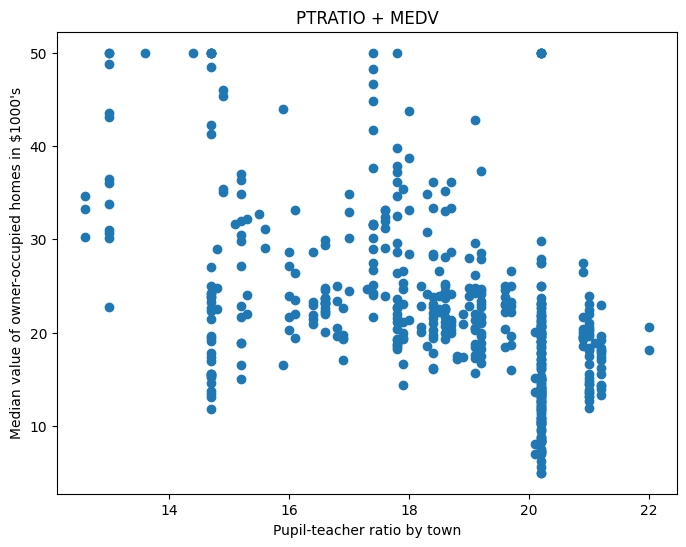

In [15]:
# зададим размер и построим график
plt.figure(figsize = (8,6))
plt.scatter(x1, y)

# добавим подписи
plt.xlabel('Pupil-teacher ratio by town', fontsize = 10)
plt.ylabel('Median value of owner-occupied homes in $1000\'s', fontsize = 10)
plt.title('PTRATIO + MEDV', fontsize = 12)

#### Построение и оценка качества модели

**Задание 4**. Возьмите все признаки и поместите их в переменную `X`. Целевую переменную `MEDV` поместите в переменную `y`.

In [24]:
X = boston_df.iloc[:, :-1]
y = target

print(type(X), type(y))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


**Задание 5**. Разделите выборку на обучающую и тестовую части.

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 42)

In [28]:
# посмотрим на новую размерность обучающей
print(X_train.shape, y_train.shape)

# и тестовой выборки
print(X_test.shape, y_test.shape)

(354, 13) (354,)
(152, 13) (152,)


**Задание 6**. Постройте модель линейной регрессии. Сделайте прогноз и выведите первые три прогнозных значения.

In [ ]:
# создадим объект этого класса и запишем в переменную model
model = LinearRegression()

# обучим нашу модель
model.fit(X_train, y_train)

In [30]:
# на основе нескольких независимых переменных (Х) предскажем цену на жилье (y)
y_pred = model.predict(X_test)

# выведем первые пять значений с помощью диапазона индексов
print(y_pred[:3])

[28.64896005 36.49501384 15.4111932 ]


**Задание 7**. Оцените качество модели через RMSE.

In [32]:
# выведем корень среднеквадратической ошибки
# сравним тестовые и прогнозные значения цен на жилье
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error (RMSE): 4.638689926172818


**Задание 8**. Оцените качество модели через R2. Какую долю изменчивости целевой переменной объясняет модель, учитывающая все признаки?

In [33]:
# посмотрим на еще одну метрику, R2
print('R2:', np.round(metrics.r2_score(y_test, y_pred), 2))

R2: 0.71
